In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_material_law(eps_v_Emn, eps_d_Emna, eps_p_v_Emn, eps_p_d_Emna,
                     kappa_Emn, E, nu, H, sigma_0, alpha, alpha_p, beta_p):
    
    K = E / (1 -2 * nu)
    G = E / 2*(1 + nu)
    
    sigma_v_trial = K * (eps_v_Emn - eps_p_v_Emn)
    sigma_d_trial = K * (eps_d_Emna - eps_p_d_Emna)
    sigma_d_inner = np.einsum('...n,...n->...',sigma_d_trial,sigma_d_trial)
    
    omega_Emn = alpha_p * (1 - np.exp(-beta_p*kappa_Emn))
    
    f = np.sqrt(3/2 * sigma_d_inner) + alpha * sigma_v_trial - (1 - omega_Emn) * (sigma_0 + H * kappa_Emn)
        
    if f > 0:
        
        delta_lambda = (np.sqrt (3/2) * np.abs(sigma_d_inner) + alpha * sigma_v_trial - (1 - omega_Emn) * 
                        (sigma_0 + H * kappa_Emn))/(3 * G + K * alpha**2 + (1 - omega_Emn) * H)
        
        if (np.sqrt(3/2)* np.abs(sigma_d_inner) - 3 * delta_lambda * G) >= 0:
        
            sigma_d_Emna = sigma_d_trial - delta_lambda * G * 3 / (np.sqrt(3/2 * sigma_d_inner)) * sigma_d_trial

            sigma_v_Emn = sigma_v_trial - delta_lambda * K * alpha

            eps_p_d_Emna = eps_d_Emna - sigma_d_Emna / (2 * G)

            eps_p_v_Emn = eps_v_Emn - sigma_v_Emn / K

            kappa_Emn = kappa_Emn + delta_lambda
            
            omega_Emn = alpha_p * (1 - np.exp(-beta_p*kappa_Emn))
            
        else: 
            
            delta_eps_v = (alpha * sigma_v_trial - (1 - omega_Emn) * (sigma_0 + H * kappa_Emn)) / (alpha * K + (1 - omega_Emn) * H / alpha)
            
            sigma_d_Emna = 0.
            
            sigma_v_Emn = sigma_v_trial - delta_eps_v * K
            
            eps_p_d_Emna = eps_d_Emna 

            eps_p_v_Emn = eps_v_Emn - sigma_v_Emn / K

            kappa_Emn = kappa_Emn + delta_eps_v / alpha
            
            omega_Emn = alpha_p * (1 - np.exp(-beta_p*kappa_Emn))
            
    else:
        sigma_d_Emna = sigma_d_trial
        sigma_v_Emn = sigma_v_trial
            
            
    return sigma_d_Emna,sigma_v_Emn,eps_p_d_Emna,eps_p_v_Emn,kappa_Emn,omega_Emn

In [3]:
eps_1 = np.linspace(0,-0.0001,1000)
eps = np.zeros((len(eps_1),3,3))
I = eps[:] +  np.eye(3,like=eps)
eps[:,0,0] = eps_1
eps[:,1,1] = -0.18 * eps_1
eps[:,2,2] = -0.18 * eps_1
eps_v_Emn = (eps[:,0,0] + eps[:,1,1] + eps[:,2,2])/3 
eps_d = eps -  np.einsum('nij, n -> nij', I, eps_v_Emn)
n = np.array([1,1,1]/np.sqrt(3))
eps_d_Emna = np.einsum('...nij, ...j -> ni',eps_d, n)

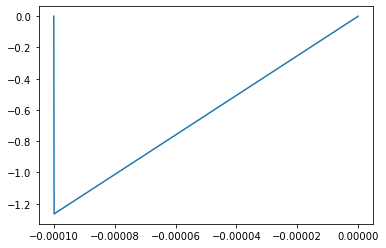

In [6]:
E = 38000
nu = 0.18
sigma_0 = 200.5
alpha = 0.2
H = 000.
beta_p = 250
alpha_p = 0.998
    
eps_p_v_Emn = np.zeros_like(eps_v_Emn)
kappa_Emn = np.zeros_like(eps_v_Emn)
sigma_v_Emn = np.zeros_like(eps_v_Emn)
omega_Emn = np.zeros_like(eps_v_Emn)
eps_p_d_Emna = np.zeros_like(eps_d_Emna)
sigma_d_Emna = np.zeros_like(eps_d_Emna)

for i in range(1,len(eps_1)-1):
    sigma_d_Emna[i],sigma_v_Emn[i],eps_p_d_Emna[i],eps_p_v_Emn[i],kappa_Emn[i],omega_Emn[i] = get_material_law(eps_v_Emn[i], eps_d_Emna[i], eps_p_v_Emn[i-1], eps_p_d_Emna[i-1], kappa_Emn[i-1], E, nu, H, sigma_0, alpha, alpha_p, beta_p)
    
plt.plot(eps_1,sigma_v_Emn)

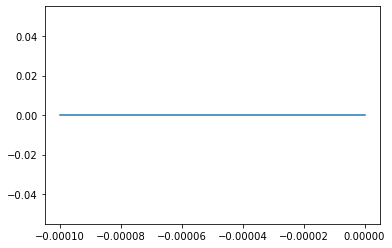

In [7]:
plt.plot(eps_1,kappa_Emn)